<a target="_blank" href="https://colab.research.google.com/github/narumiruna/cryptodataset/blob/main/notebooks/ppo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [4]:
!pip install -U pip > log.txt
!pip install stable-baselines3 cryptodataset >> log.txt

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
from cryptodataset.envs import TradingEnv
from stable_baselines3 import PPO
import quantstats as qs
import pandas as pd

In [6]:
exchange = 'KuCoin'
symbol = 'BTC/USDT'
train_test_split = "2022-01-01"
metric_currency = 'base'

In [7]:
def evaluate(model, env):
    obs = env.reset()

    done = False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
    
    return env.get_metrics()

In [8]:
train_env = TradingEnv(exchange=exchange, symbol=symbol, end=train_test_split, metric_currency=metric_currency)
model = PPO(policy='MlpPolicy', env=train_env)
for i in range(10):
    model.learn(5_000)

    metrics = evaluate(model, train_env)
    print(metrics)

2023-03-23 05:04:14.183 | INFO     | cryptodataset.ccxt:download_ohlcv:68 - data/KuCoin_BTCUSDT_1h.csv already exists, reading data from file


{'compsum': -0.8821904077188921, 'max_drawdown': -0.9459512406085622, 'sharpe': -0.06507886574891068}
{'compsum': 0.39419961441674256, 'max_drawdown': -0.8653755226539489, 'sharpe': 0.07734095302441682}
{'compsum': 0.7855732106824984, 'max_drawdown': -0.9311769473465571, 'sharpe': 0.0946186353706705}
{'compsum': 0.9688318121863624, 'max_drawdown': -0.9229207129046406, 'sharpe': 0.1012402844646582}
{'compsum': 0.8507834794394722, 'max_drawdown': -0.9463888686008893, 'sharpe': 0.09588148246712731}
{'compsum': 1.4487989629366895, 'max_drawdown': -0.9432984216328143, 'sharpe': 0.11073198066662644}
{'compsum': 4.910376561638175, 'max_drawdown': -0.9307777283161067, 'sharpe': 0.16151608601538703}
{'compsum': 14.823094942324643, 'max_drawdown': -0.9166938205201224, 'sharpe': 0.2191209305835058}
{'compsum': 32.79079428848614, 'max_drawdown': -0.8893713316504126, 'sharpe': 0.2578037329039605}
{'compsum': 92.2006079679303, 'max_drawdown': -0.8974547636699705, 'sharpe': 0.3073413283320217}


In [12]:
# test_env = TradingEnv(exchange=exchange, symbol=symbol, start=train_test_split, metric_currency=metric_currency)
test_env = TradingEnv(exchange=exchange, symbol=symbol, start=train_test_split, metric_currency=metric_currency)
print(evaluate(model, test_env))


2023-03-23 05:18:58.415 | INFO     | cryptodataset.ccxt:download_ohlcv:68 - data/KuCoin_BTCUSDT_1h.csv already exists, reading data from file


{'compsum': 0.9115293260407995, 'max_drawdown': -0.3019112439483591, 'sharpe': 0.2512993866455918}


[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2022-01-01
End Period                 2023-03-23
Risk-Free Rate             0.0%
Time in Market             48.0%

Cumulative Return          91.15%
CAGR﹪                     69.93%

Sharpe                     0.25
Prob. Sharpe Ratio         94.94%
Smart Sharpe               0.25
Sortino                    0.36
Smart Sortino              0.36
Sortino/√2                 0.25
Smart Sortino/√2           0.25
Omega                      1.08

Max Drawdown               -30.19%
Longest DD Days            132
Volatility (ann.)          7.06%
Calmar                     2.32
Skew                       0.16
Kurtosis                   27.12

Expected Daily %           0.01%
Expected Monthly %         4.41%
Expected Yearly %          38.26%
Kelly Criterion            3.71%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.72%
Expected Shortfall (cVaR)  -0.72%

Max

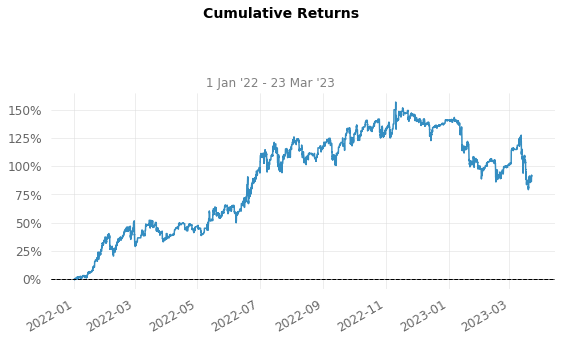

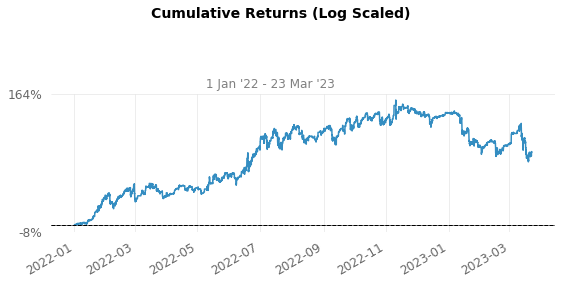

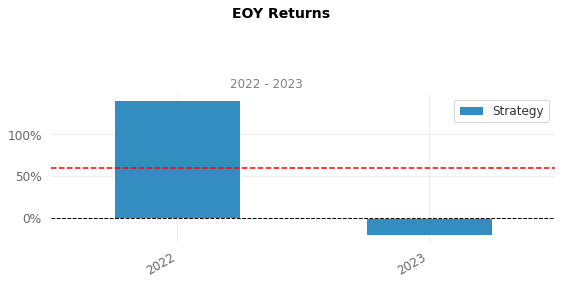

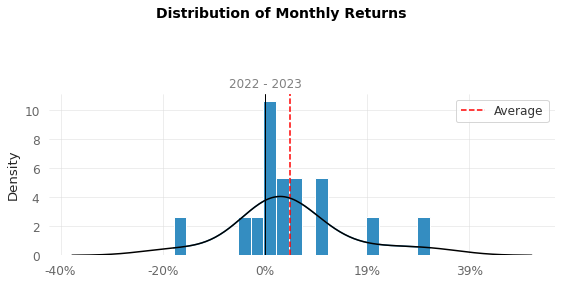

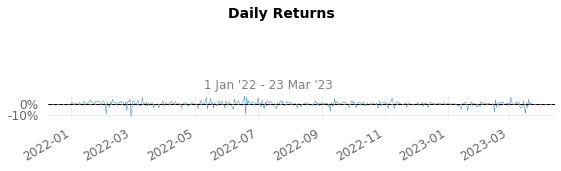

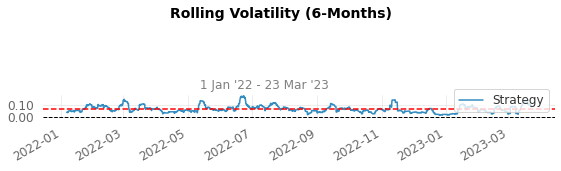

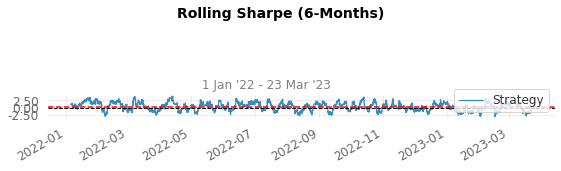

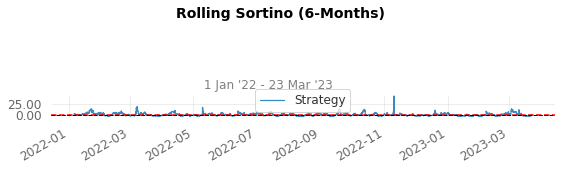

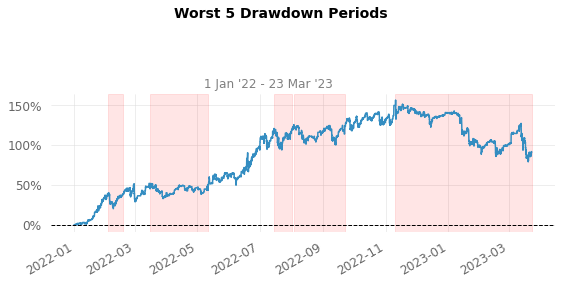

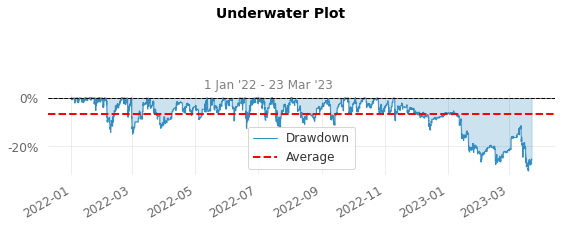

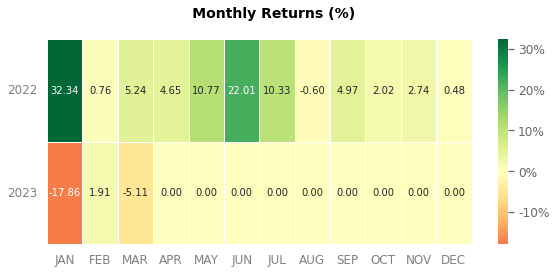

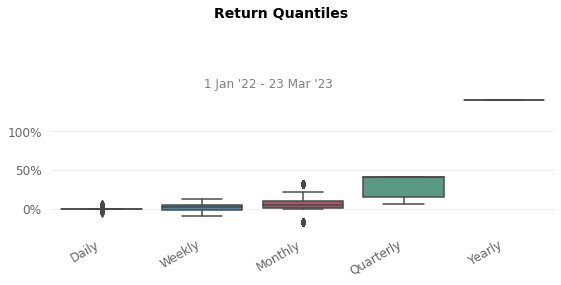

In [13]:

returns = pd.Series(test_env.values, index=test_env.prices.index).pct_change()
# qs.reports.html(returns, output='report.html')
qs.reports.full(returns)

In [14]:
class BuyAndHold:
    def predict(self, obs, *args, **kwargs):
        return 2, None
print(evaluate(BuyAndHold(), test_env))

{'compsum': 0.0, 'max_drawdown': 0.0, 'sharpe': nan}


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.9/dist-packages/quantstats/stats.py:293: RuntimeWarning: invalid value encountered in double_scalars
  res = returns.mean() / divisor


In [15]:
class Hold:
    def predict(self, obs, *args, **kwargs):
        return 1, None
print(evaluate(Hold(), test_env))

{'compsum': 0.7068175082598442, 'max_drawdown': -0.4537197352620851, 'sharpe': 0.17217665780876698}


DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2023-03-22 18:00:00', '2023-03-22 19:00:00',
               '2023-03-22 20:00:00', '2023-03-22 21:00:00',
               '2023-03-22 22:00:00', '2023-03-22 23:00:00',
               '2023-03-23 00:00:00', '2023-03-23 01:00:00',
               '2023-03-23 02:00:00', '2023-03-23 03:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10708, freq=None)